In [1]:
!pip install seaborn

In [3]:
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [17]:
ld= pd.read_csv('laptops.csv', encoding= 'ISO-8859-1',index_col= 0 )

In [14]:
ld.head

<bound method NDFrame.head of      Company                              Product            TypeName  Inches  \
1      Apple                          MacBook Pro           Ultrabook    13.3   
2      Apple                          Macbook Air           Ultrabook    13.3   
3         HP                               250 G6            Notebook    15.6   
4      Apple                          MacBook Pro           Ultrabook    15.4   
5      Apple                          MacBook Pro           Ultrabook    13.3   
...      ...                                  ...                 ...     ...   
1316  Lenovo                       Yoga 500-14ISK  2 in 1 Convertible    14.0   
1317  Lenovo                       Yoga 900-13ISK  2 in 1 Convertible    13.3   
1318  Lenovo                   IdeaPad 100S-14IBR            Notebook    14.0   
1319      HP  15-AC110nv (i7-6500U/6GB/1TB/Radeon            Notebook    15.6   
1320    Asus  X553SA-XX031T (N3050/4GB/500GB/W10)            Notebook    15.6  

In [18]:
ld.shape

(1303, 12)

In [21]:
ld.drop(['Product', 'ScreenResolution', 'Cpu', 'Memory', 'Gpu', 'Weight'], inplace= True, axis= 1)

In [22]:
ld.shape

(1303, 6)

In [23]:
ld.sample(10)

,Company,TypeName,Inches,Ram,OpSys,Price_euros
21,Asus,Netbook,11.6,2GB,Windows 10,191.90
1252,Apple,Ultrabook,11.6,4GB,Mac OS X,959.00
777,Samsung,Ultrabook,13.3,8GB,Windows 10,1599.00
785,Lenovo,Notebook,15.6,16GB,Windows 7,2370.00
685,HP,2 in 1 Convertible,11.6,8GB,Chrome OS,495.00
346,Dell,Notebook,15.6,4GB,Linux,274.90
193,Dell,Notebook,17.3,8GB,Windows 10,1085.00
554,Lenovo,Notebook,15.6,4GB,No OS,462.35
1219,Lenovo,Notebook,15.6,8GB,No OS,629.00
373,Lenovo,Gaming,15.6,8GB,No OS,809.00


In [24]:
ld.TypeName.value_counts()

Notebook              727
Gaming                205
Ultrabook             196
2 in 1 Convertible    121
Workstation            29
Netbook                25
Name: TypeName, dtype: int64

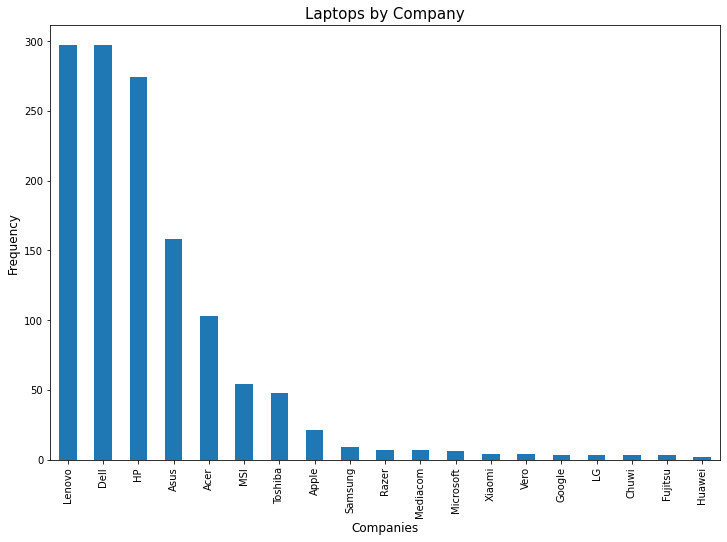

In [26]:
plt.figure(figsize= (12,8))
ld['Company'].value_counts().plot(kind= 'bar')
plt.title('Laptops by Company', fontsize= 15)
plt.xlabel('Companies', fontsize= 12)
plt.ylabel('Frequency', fontsize= 12)
plt.show()

<AxesSubplot:>

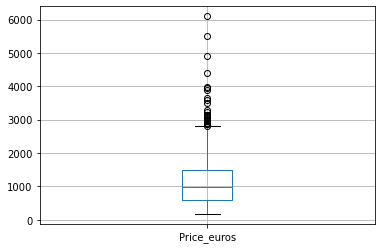

In [30]:
ld[['Price_euros']].boxplot()

Text(0.5, 1.0, 'Company Value')

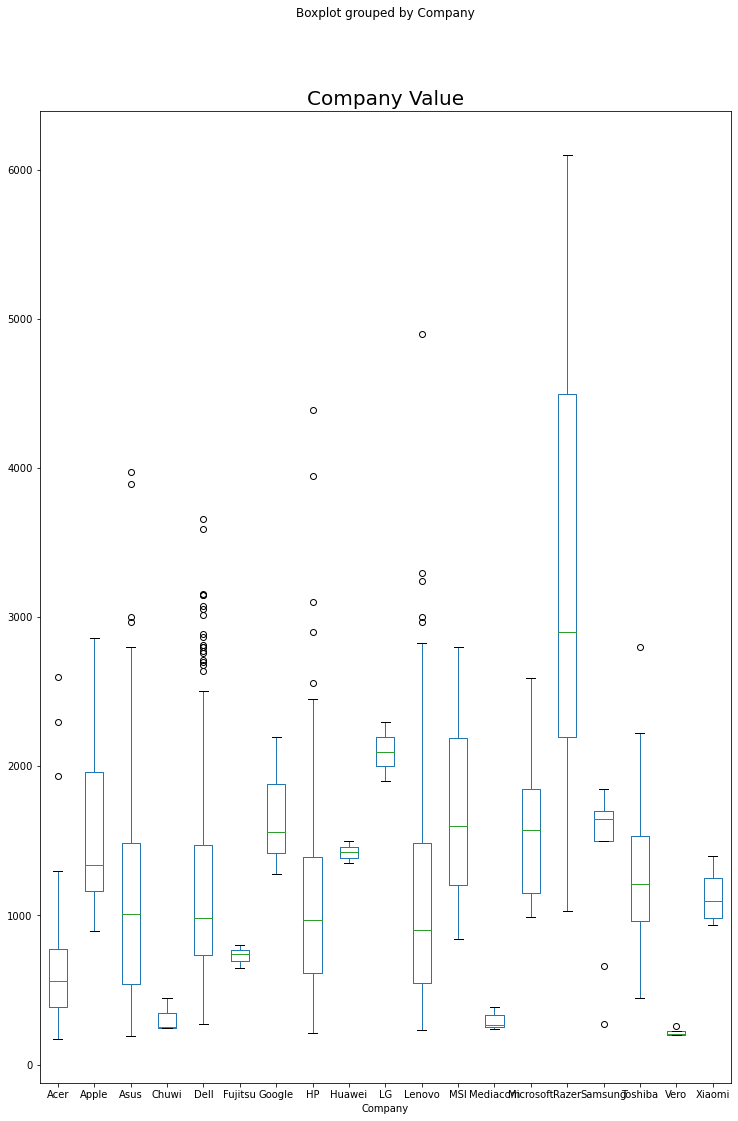

In [38]:
ld.boxplot(by= 'Company', column= ['Price_euros'], grid= False, figsize= (12,18) )
plt.title('Company Value', fontsize= 20)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:1296: UserWarning: 40.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


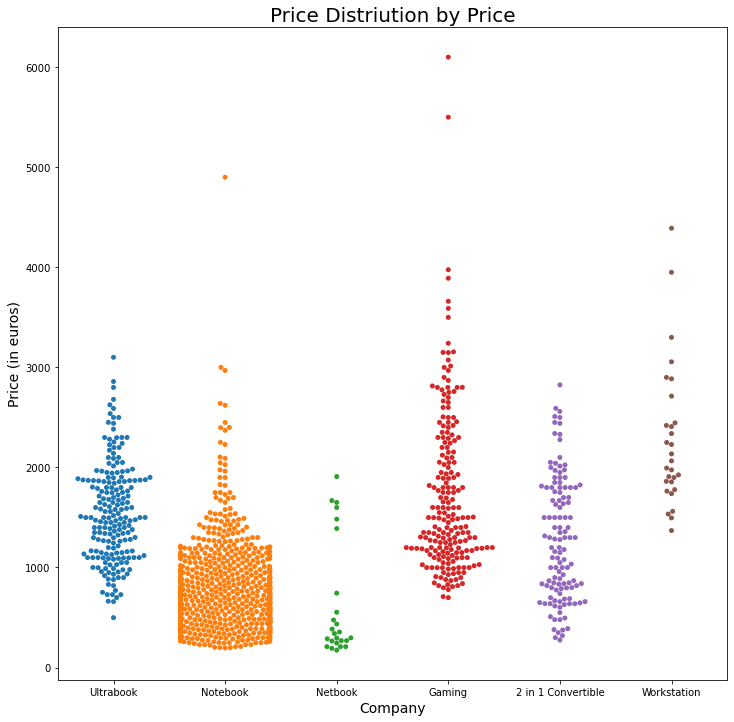

In [48]:
plt.figure(figsize= (12,12))
sns.swarmplot(x= 'TypeName', y= 'Price_euros', data= ld)
plt.title('Price Distriution by Price', fontsize= 20)
plt.xlabel('Company', fontsize= 14)
plt.ylabel('Price (in euros)', fontsize= 14)
plt.show()

In [51]:
from sklearn.preprocessing import LabelEncoder
le= LabelEncoder()
ld['TypeName']= le.fit_transform(ld['TypeName'])
ld.head()

,Company,TypeName,Inches,Ram,OpSys,Price_euros
1,Apple,4,13.3,8GB,macOS,1339.69
2,Apple,4,13.3,8GB,macOS,898.94
3,HP,3,15.6,8GB,No OS,575.00
4,Apple,4,15.4,16GB,macOS,2537.45
5,Apple,4,13.3,8GB,macOS,1803.60


In [66]:
dla= pd.get_dummies(ld)

In [67]:
dla.head

<bound method NDFrame.head of       TypeName  Inches  Price_euros  Company_Acer  Company_Apple  \
1            4    13.3      1339.69             0              1   
2            4    13.3       898.94             0              1   
3            3    15.6       575.00             0              0   
4            4    15.4      2537.45             0              1   
5            4    13.3      1803.60             0              1   
...        ...     ...          ...           ...            ...   
1316         0    14.0       638.00             0              0   
1317         0    13.3      1499.00             0              0   
1318         3    14.0       229.00             0              0   
1319         3    15.6       764.00             0              0   
1320         3    15.6       369.00             0              0   

      Company_Asus  Company_Chuwi  Company_Dell  Company_Fujitsu  \
1                0              0             0                0   
2                

In [68]:
from sklearn.model_selection import train_test_split
X= dla.drop('Price_euros', axis= 1)
y= dla['Price_euros']


In [69]:
X_train, X_test, y_train, y_test= (train_test_split(X, y, test_size= 0.2))

In [79]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import r2_score
lg= LinearRegression()

In [80]:
lg.fit(X_train, y_train)


LinearRegression()

In [81]:
lg.score(X_train, y_train)

0.6872732053025628

In [88]:
y_pred= lg.predict(X_test)

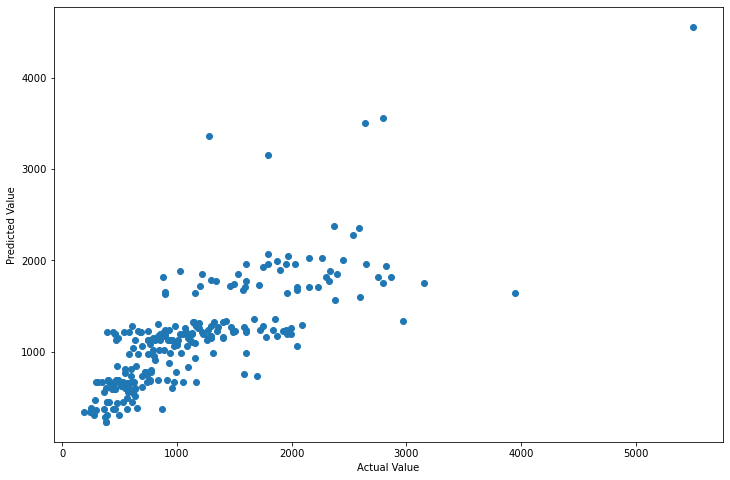

In [100]:
plt.figure(figsize= (12,8))
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Value')
plt.ylabel('Predicted Value')
plt.show()